In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df=pd.read_csv('train_data.csv')

In [32]:
df.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1


In [33]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   Unnamed: 0                                    109248 non-null  int64 
 1   id                                            109248 non-null  object
 2   teacher_id                                    109248 non-null  object
 3   teacher_prefix                                109245 non-null  object
 4   school_state                                  109248 non-null  object
 5   project_submitted_datetime                    109248 non-null  object
 6   project_grade_category                        109248 non-null  object
 7   project_subject_categories                    109248 non-null  object
 8   project_subject_subcategories                 109248 non-null  object
 9   project_title                                 109248 non-nu

In [34]:
df.describe()

,Unnamed: 0,teacher_number_of_previously_posted_projects,project_is_approved
count,109248.000000,109248.000000,109248.000000
mean,91183.786568,11.153165,0.848583
std,52548.095272,27.777154,0.358456
min,0.000000,0.000000,0.000000
25%,45743.500000,0.000000,1.000000
50%,91253.500000,2.000000,1.000000
75%,136712.500000,9.000000,1.000000
max,182079.000000,451.000000,1.000000


In [35]:
df.nunique()

Unnamed: 0                                      109248
id                                              109248
teacher_id                                       72168
teacher_prefix                                       5
school_state                                        51
project_submitted_datetime                      108537
project_grade_category                               4
project_subject_categories                          51
project_subject_subcategories                      401
project_title                                   100851
project_essay_1                                  94319
project_essay_2                                 108832
project_essay_3                                   3755
project_essay_4                                   3750
project_resource_summary                        108324
teacher_number_of_previously_posted_projects       374
project_is_approved                                  2
dtype: int64

### Teacher Experience vs. Project Approval Rate
--> We investigate whether teacher experience impacts proposal approval rates.

In [36]:
df[['teacher_number_of_previously_posted_projects','project_is_approved']].dtypes

teacher_number_of_previously_posted_projects    int64
project_is_approved                             int64
dtype: object

In [37]:
df[['teacher_number_of_previously_posted_projects','project_is_approved']].isna().sum()

teacher_number_of_previously_posted_projects    0
project_is_approved                             0
dtype: int64

In [38]:
df['project_is_approved'].value_counts()

project_is_approved
1    92706
0    16542
Name: count, dtype: int64

In [39]:
conditions = [
    (df['teacher_number_of_previously_posted_projects'] == 0),
    (df['teacher_number_of_previously_posted_projects'] >= 1) & (df['teacher_number_of_previously_posted_projects'] <= 5),
    (df['teacher_number_of_previously_posted_projects'] >= 6) & (df['teacher_number_of_previously_posted_projects'] <= 20),
    (df['teacher_number_of_previously_posted_projects'] > 20)
]

choices = ['New', 'Moderate', 'Experienced', 'Veteran']

df['teacher_experience'] = np.select(conditions, choices, default='Not Applicable')


In [40]:
#Total Number of Proposals in Each Experience Group
df['teacher_experience'].value_counts()

teacher_experience
Moderate       42955
New            30014
Experienced    21726
Veteran        14553
Name: count, dtype: int64

In [41]:
#Total Number of Approved Proposals in Each Group
df[df['project_is_approved']==1].groupby('teacher_experience').size()

teacher_experience
Experienced    18812
Moderate       36019
New            24652
Veteran        13223
dtype: int64

<Axes: xlabel='teacher_experience', ylabel='count'>

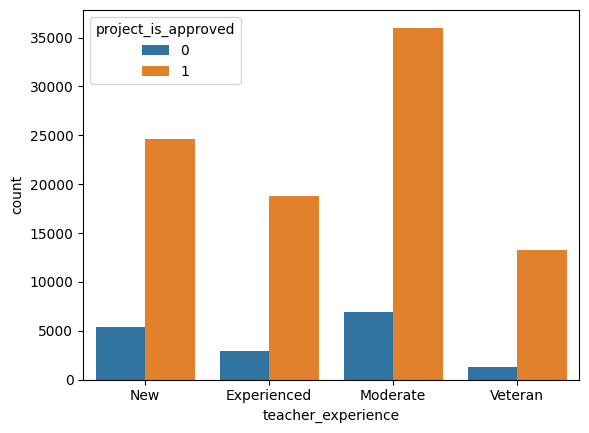

In [42]:
sns.countplot(x='teacher_experience', hue='project_is_approved', data=df)

In [43]:
#approval Rate by Experience Group

approval_counts = df[df['project_is_approved'] == 1].groupby('teacher_experience').size()
total_counts = df.groupby('teacher_experience').size()
approval_rate = (approval_counts / total_counts)*100.00

summary_df = pd.DataFrame({
    'total_projects': total_counts,
    'approved_projects': approval_counts,
    'approval_rate': approval_rate
})

summary_df


,total_projects,approved_projects,approval_rate
teacher_experience,,,
Experienced,21726,18812,86.587499
Moderate,42955,36019,83.852869
New,30014,24652,82.135004
Veteran,14553,13223,90.860991


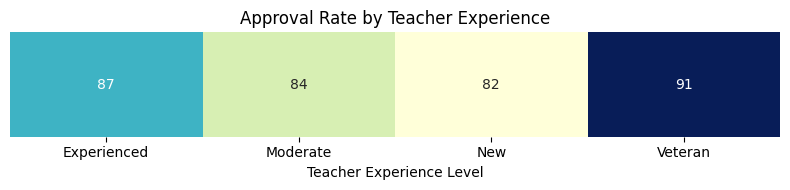

In [44]:
plt.figure(figsize=(8, 2))
sns.heatmap(summary_df[['approval_rate']].T, annot=True, cmap="YlGnBu", cbar=False)
plt.title("Approval Rate by Teacher Experience")
plt.xlabel("Teacher Experience Level")
plt.yticks([]) 
plt.tight_layout()
plt.show()


1. Approval rates steadily increase as teachers move from New → Moderate → Experienced → Veteran.
2. The most experienced group ("Veteran") has an 8.7 percentage point higher approval rate than "New" teachers.
3. The “New” group has the lowest approval rate among all experience levels.

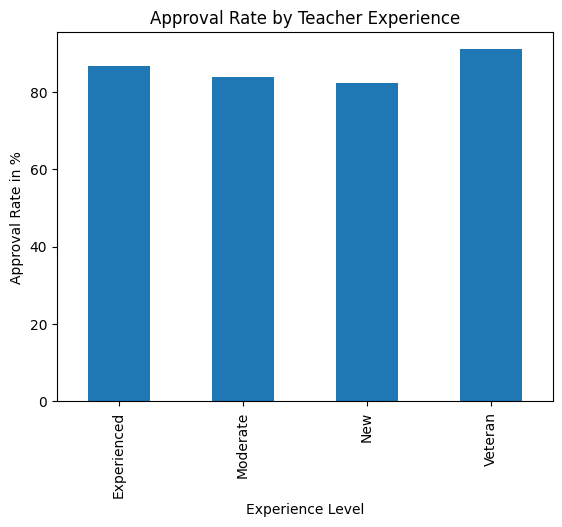

In [45]:
#The approval rate across the teacher_experience
summary_df['approval_rate'].plot(kind='bar', title='Approval Rate by Teacher Experience', xlabel='Experience Level', ylabel='Approval Rate in %');

Text(0, 0.5, '# Previously Posted Projects')

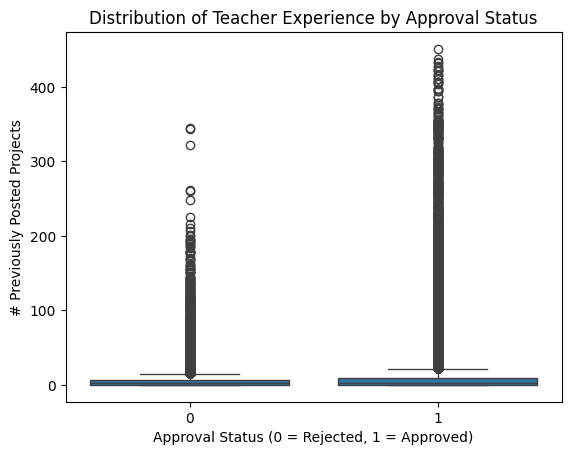

In [46]:
#Distribution of number of previously posted projects between approved and rejected proposals:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='project_is_approved', y='teacher_number_of_previously_posted_projects', data=df)
plt.title('Distribution of Teacher Experience by Approval Status')
plt.xlabel('Approval Status (0 = Rejected, 1 = Approved)')
plt.ylabel('# Previously Posted Projects')


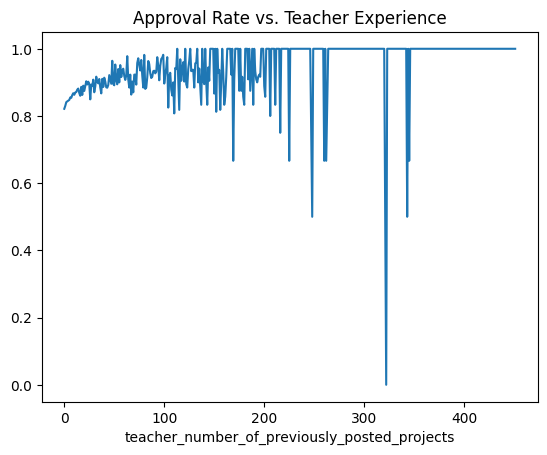

In [47]:
#Trend of Approval Rate by Exact Experience Count, Instead of bins.
experience_level = df.groupby('teacher_number_of_previously_posted_projects')['project_is_approved'].mean()
experience_level.plot(kind='line', title='Approval Rate vs. Teacher Experience');

1. Approval rate increases steadily from 0 to ~30–50 previously posted projects.
2. From ~50 onward, the approval rate flattens out, generally hovering near 1.0.
3. Beyond ~150–200 projects, the line becomes noisy and erratic with sharp drops—even hitting close to 0.0 at certain points.

### Summary of Findings
Experienced teachers (6–20 prior projects) have a notably higher approval rate (86.6%) compared to new teachers (82.1%). This trend peaks with Veteran teachers (90.9%), suggesting that proposal quality improves with experience. However, a line plot of individual experience shows a plateau effect after ~50 proposals, indicating a point of diminishing returns.


## Hypothesis Testing: Teachers with prior experience have significantly higher approval rates than first-time teachers.

Group A (New Teachers): teacher_number_of_previously_posted_projects == 0 <br>
Group B (Experienced Teachers): teacher_number_of_previously_posted_projects > 0

In [57]:
Group_A=df[df['teacher_number_of_previously_posted_projects']==0]['project_is_approved']
Group_B=df[df['teacher_number_of_previously_posted_projects']>0]['project_is_approved']

μA : mean approval rate of new teachers <br>
μB  : mean approval rate of experienced teachers <br>
Null Hypothesis H0: (μA=μB)(No difference in approval rates) <br>
Alternative Hypothesis H1: (μA<μB) (Experienced teachers have higher approval rates) <br>

This is a one-tailed, independent two-sample t-test.

In [58]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(Group_A, Group_B, equal_var=False, alternative='less')


In [59]:
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -14.821017590699288
P-value: 6.833290982091162e-50


### Hypothesis Test: Does Experience Improve Approval Rates?

We conducted a one-tailed t-test to compare approval rates between:
- **New teachers** (no prior submissions)
- **Experienced teachers** (at least one prior submission)

**Results**:
- T-statistic = -14.82
- P-value = 6.83 × 10⁻⁵⁰

With a p-value far below 0.05, we **reject the null hypothesis**.

**Conclusion**: Teachers with prior project experience have significantly higher approval rates.
